# 임포트 패키지
---

In [1]:
!pip install pymysql

     |████████████████████████████████| 43 kB 1.7 MB/s 


In [2]:
import numpy as np
import pandas as pd
import pymysql
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras import Sequential, callbacks
from tensorflow.keras.layers import Dense, GRU, Dropout, LSTM, InputLayer
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 전처리
---

In [157]:
conn = pymysql.connect(host='34.64.224.44', user='root', password='A412GBVSDsawe%$we', db='smart_factory')
sql_state='select * from `rawdata`'
df=pd.read_sql_query(sql_state, conn)

conn = pymysql.connect(host='34.64.224.44', user='root', password='A412GBVSDsawe%$we', db='smart_factory')
sql_state='select * from `weather`'
df_weather=pd.read_sql_query(sql_state, conn)

df = df.loc[df['SOLDDATE'] >= '2018-01-01']
df = pd.merge(df, df_weather, how = 'inner', on = 'SOLDDATE')

df

,SOLDDATE,CUSTID,PRODNAME,PRODCODE,REGION_U,TEMP_M,HUM_M,CONSTRUCTION,CONSTRUCTION_RATE,QUANT,TEMP,HUM
0,2018-01-01,2001102.000000,PEMA-HR1000,PEMA013105210,대구광역시,0.000000,0.32187,0.245558,0.12766,7300.0,-0.500,50.73125
1,2018-01-01,2005400.000000,PEMA-SR2000,PEMA033082100,울산광역시,0.000000,0.32187,0.245558,0.12766,5400.0,-0.500,50.73125
2,2018-01-01,2005400.000000,PEMA-HR1500,PEMA013081200,전라남도,0.000000,0.32187,0.245558,0.12766,6700.0,-0.500,50.73125
3,2018-01-01,2006500.000000,PEMA-HR1500,PEMA143057600,울산광역시,0.000000,0.32187,0.245558,0.12766,6700.0,-0.500,50.73125
4,2018-01-01,2005200.000000,PEMA-SR3000F,PEMA043070800,충청북도,0.000000,0.32187,0.245558,0.12766,4400.0,-0.500,50.73125
...,...,...,...,...,...,...,...,...,...,...,...,...
41828,2021-12-31,2005400.000000,CSA5000,PEMA013111300,충청북도,0.240586,0.38800,1.000000,0.50922,9300.0,-4.175,40.31250
41829,2021-12-31,2006400.000000,PEMA-PR1000,PEMA013033302,경상북도,0.251046,0.35100,1.000000,0.50922,12000.0,-4.175,40.31250
41830,2021-12-31,2006612.000000,PEMA-HR1000,PEMA013089210,충청남도,0.230126,0.57800,1.000000,0.50922,10200.0,-4.175,40.31250
41831,2021-12-31,2007302.000000,PEMA-PR1000,PEMA023129801,충청북도,0.240586,0.38800,1.000000,0.50922,11100.0,-4.175,40.31250


In [128]:
conn = pymysql.connect(host='34.64.224.44', user='root', password='A412GBVSDsawe%$we', db='smart_factory')
sql_state='select * from `demandforecast`'
df=pd.read_sql_query(sql_state, conn)

df

,SOLDDATE,PRODNAME,QUANT
0,2022-01-01,PEMA-HR1000,66742.00
1,2022-01-02,PEMA-HR1000,68673.90
2,2022-01-03,PEMA-HR1000,81873.30
3,2022-01-04,PEMA-HR1000,81729.60
4,2022-01-05,PEMA-HR1000,75263.70
...,...,...,...
1754,2022-05-16,SRE-110,11456.00
1755,2022-05-26,SRE-110,14167.40
1756,2022-02-09,PEMA-HR1000S,5782.54
1757,2022-02-18,PEMA-HR1000S,4315.77


## # 단순 분석용 데이터
---
- 판매량

In [129]:
df_all = df[['SOLDDATE','QUANT']].groupby(['SOLDDATE']).sum()

df_all

,QUANT
SOLDDATE,
2022-01-01,146638.97
2022-01-02,164258.78
2022-01-03,173462.45
2022-01-04,195809.86
2022-01-05,215583.06
...,...
2022-06-25,122492.42
2022-06-26,146604.88
2022-06-27,165927.35


### # 데이터 시각화
---

Text(0.5, 1.0, 'QUANT')

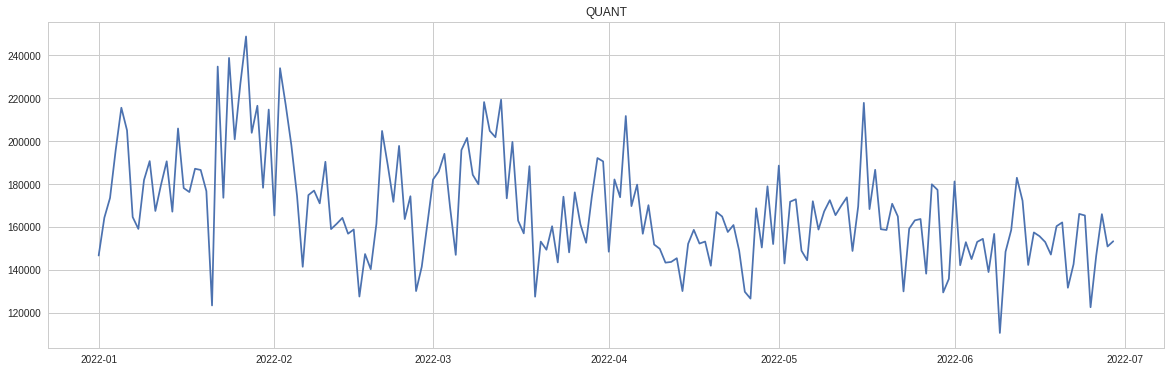

In [130]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.style.use(['seaborn-whitegrid'])
plt.plot(df_all['QUANT'])
plt.title('QUANT')

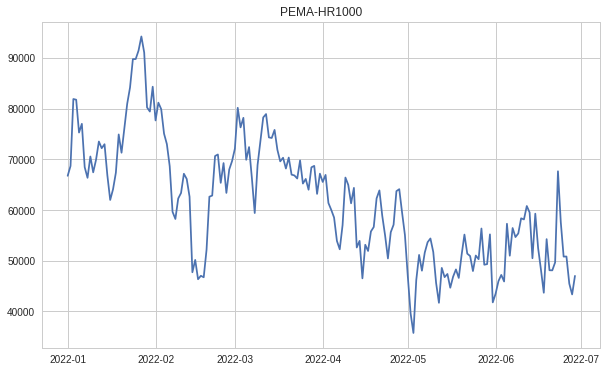

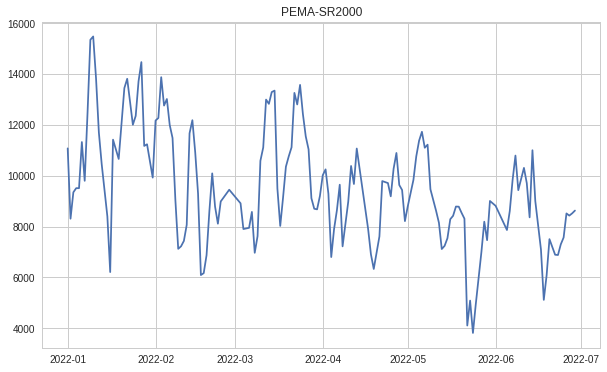

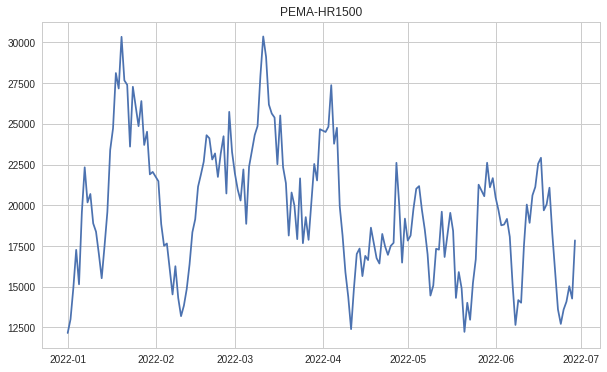

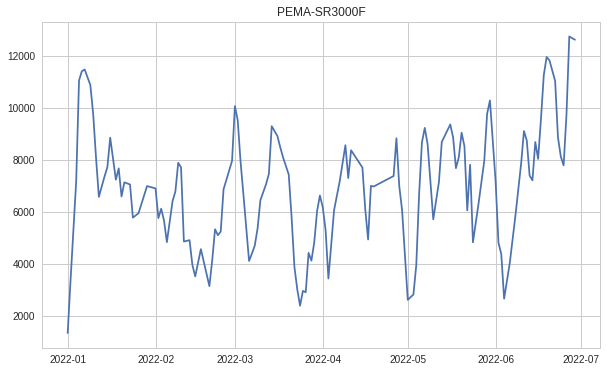

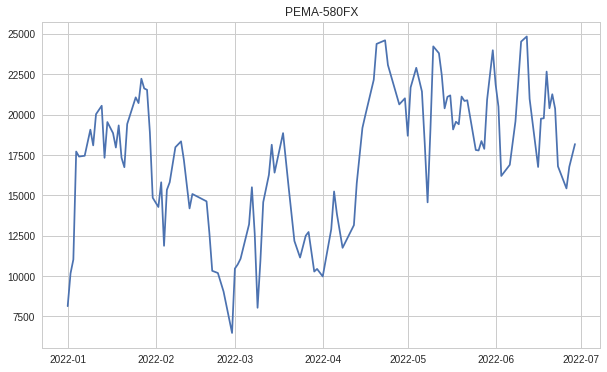

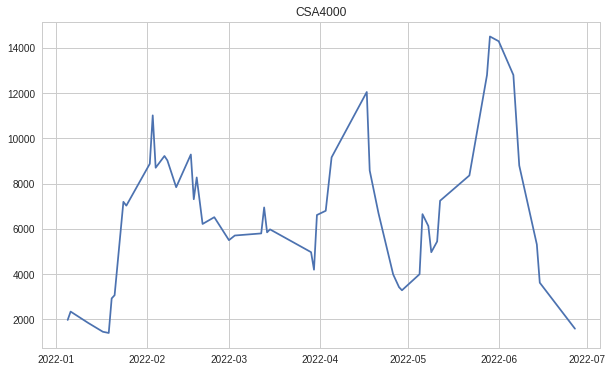

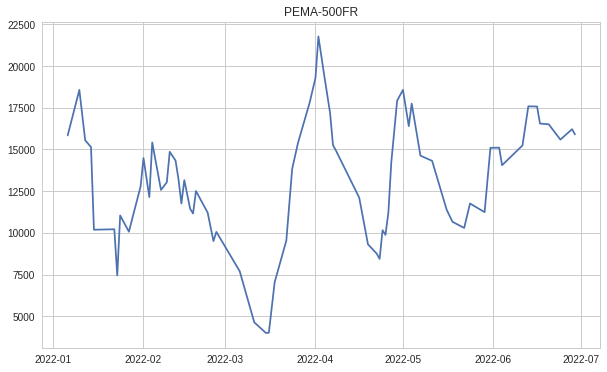

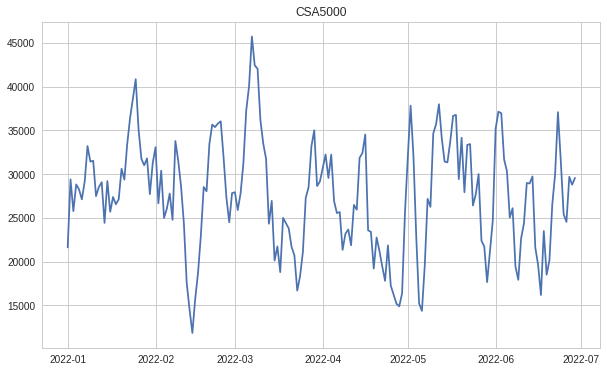

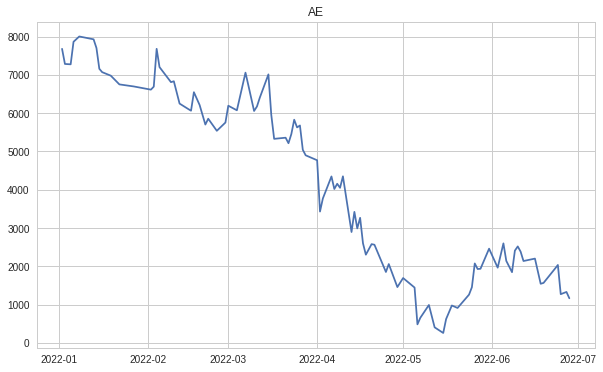

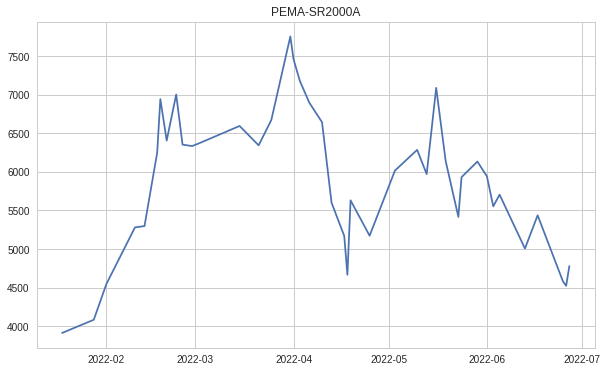

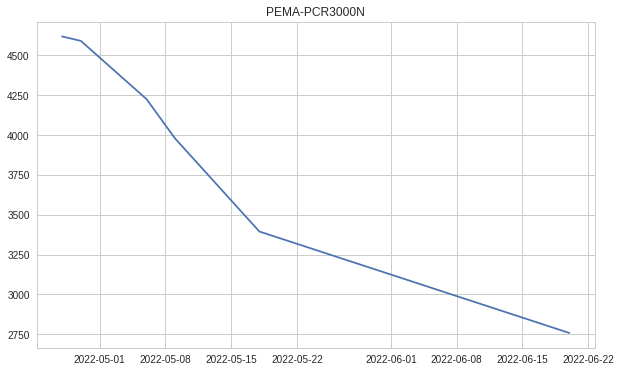

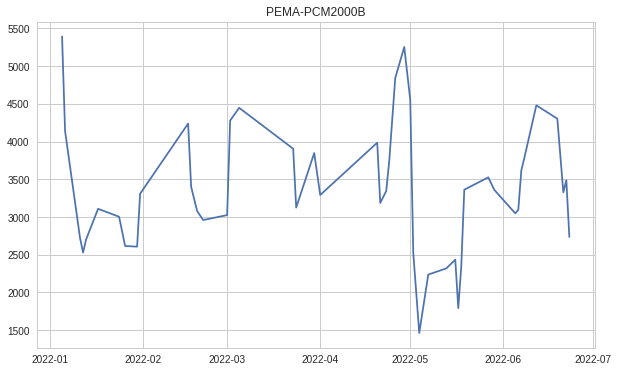

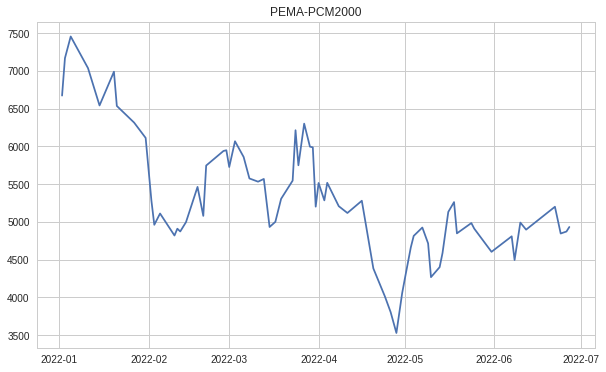

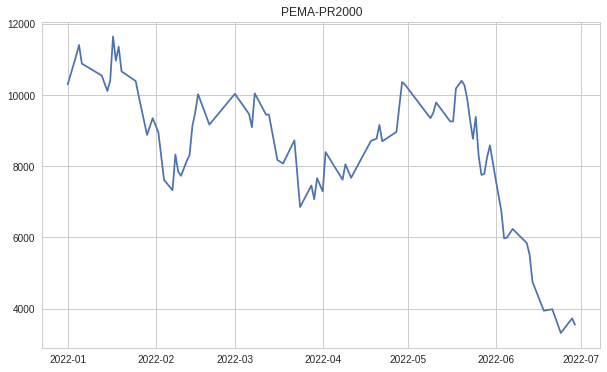

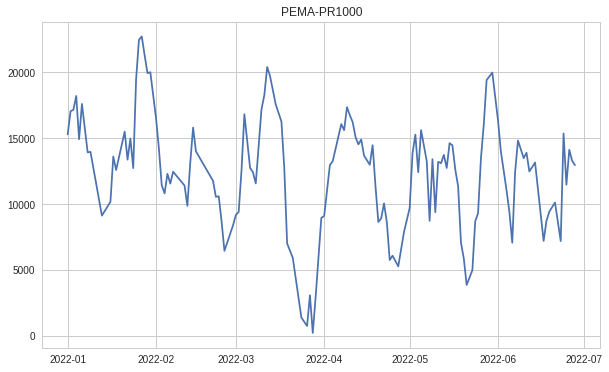

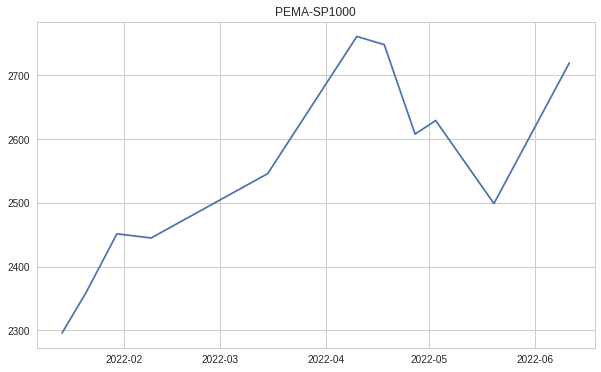

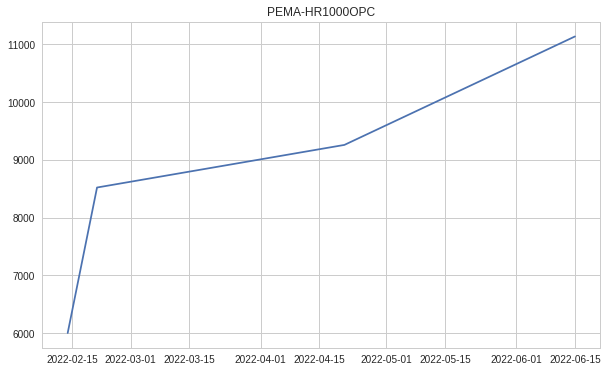

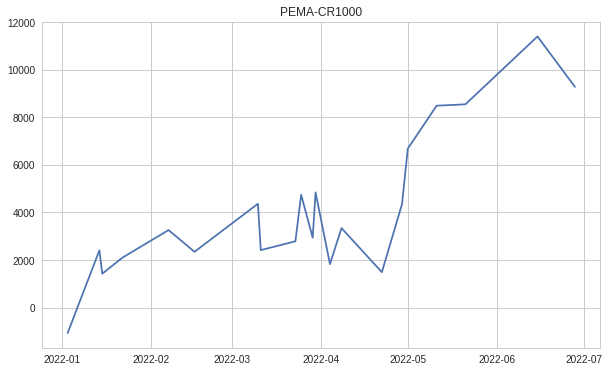

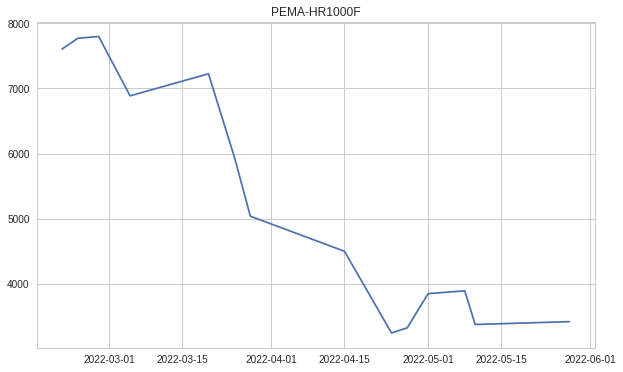

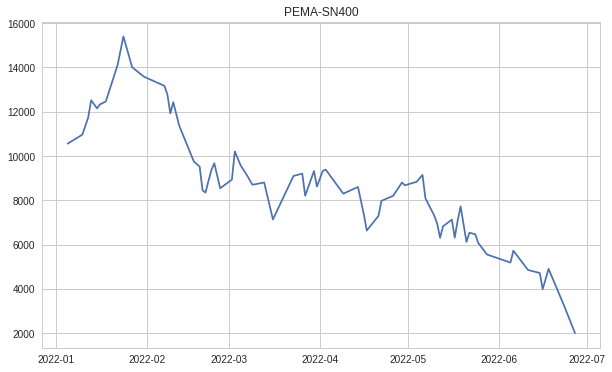

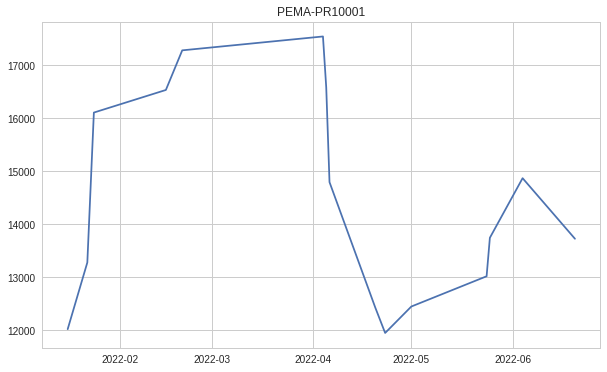

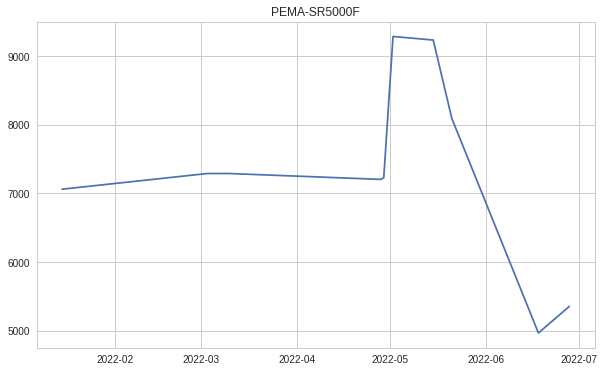

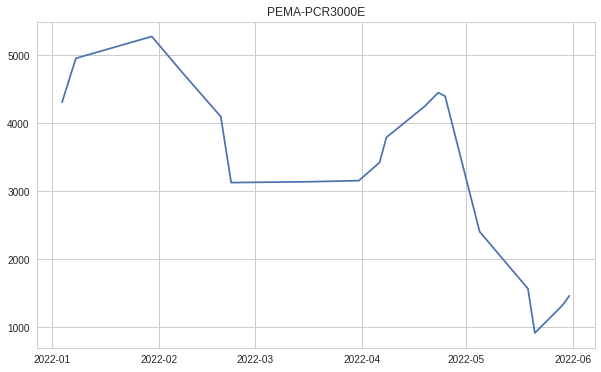

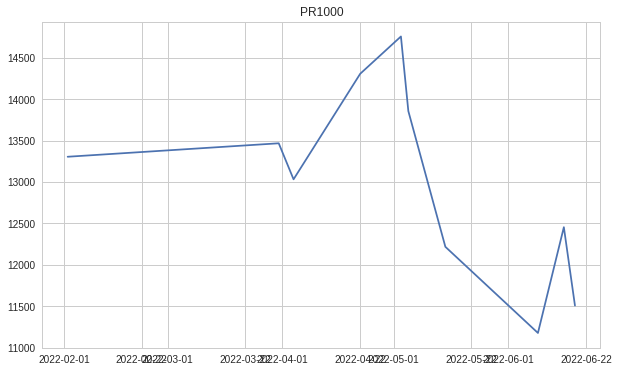

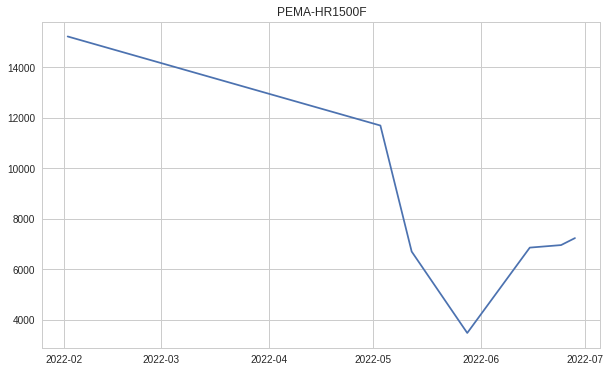

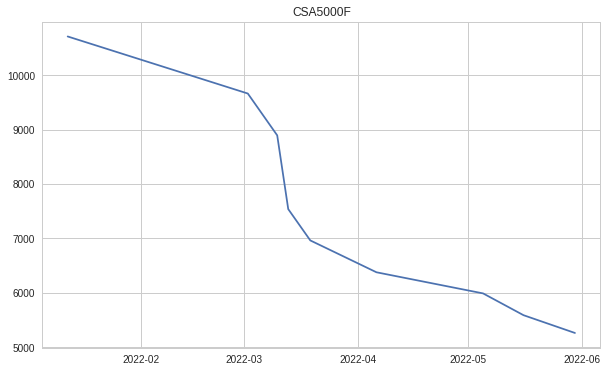

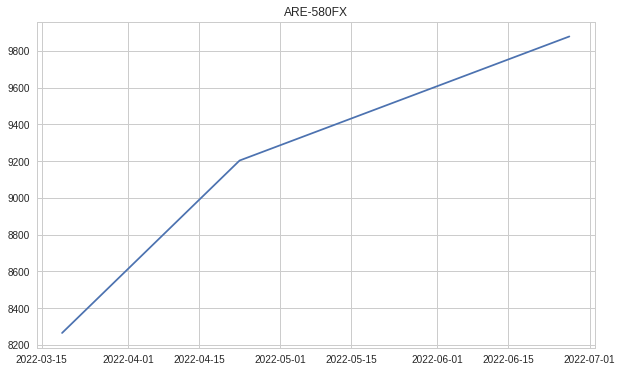

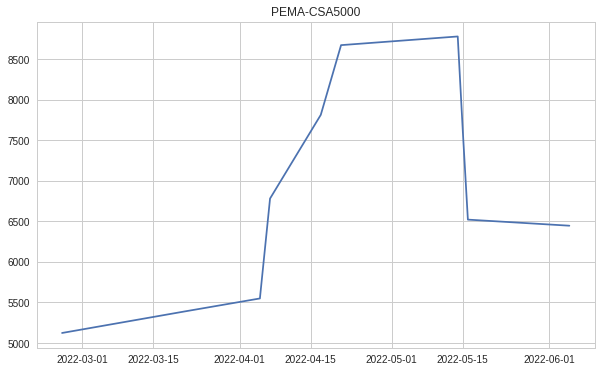

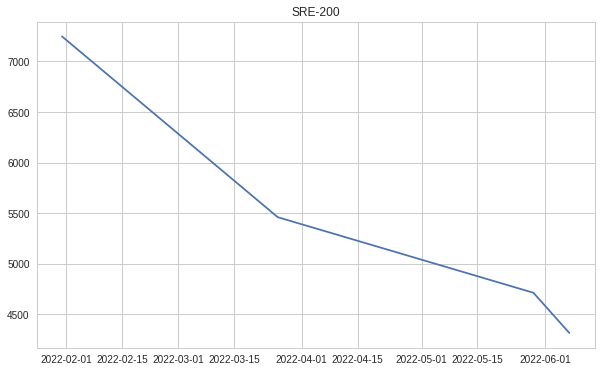

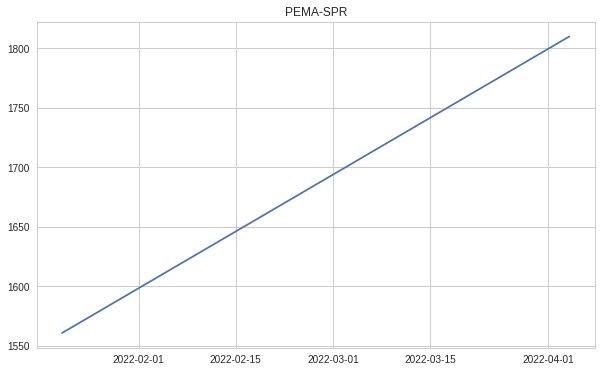

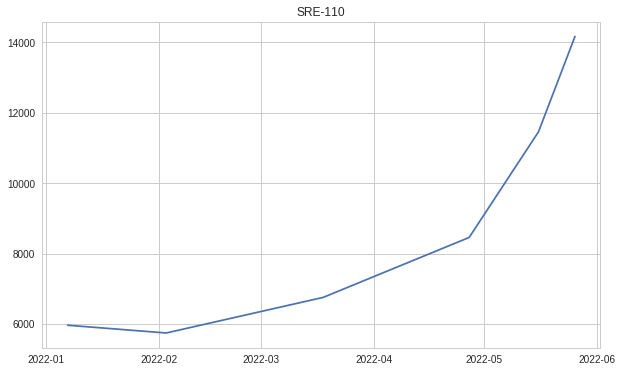

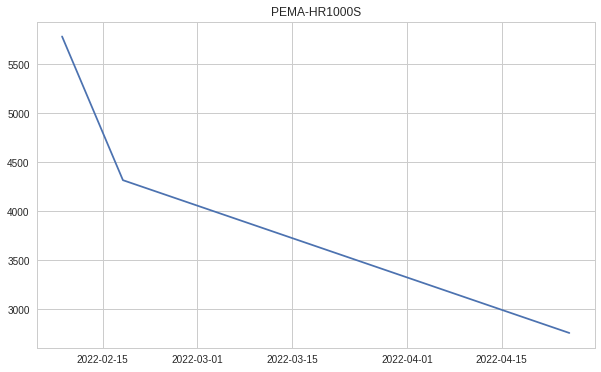

In [5]:
import matplotlib.pyplot as plt

for i in df['PRODNAME'].unique():
    df_all = df.loc[df['PRODNAME'] == i][['SOLDDATE','QUANT']].groupby(['SOLDDATE']).sum()
    plt.figure(figsize=(10, 6))
    plt.style.use(['seaborn-whitegrid'])
    plt.plot(df_all['QUANT'])
    plt.title(i)
    plt.show()

## # 다중 분석용 데이터
---
- 온도, 습도, 판매량

In [170]:
# PEMA-HR1000

df_temp=df.loc[df['PRODNAME'] == 'PEMA-HR1000'][['SOLDDATE','QUANT']].groupby(['SOLDDATE']).sum()
df_temp1=df.loc[df['PRODNAME'] == 'PEMA-HR1000'][['SOLDDATE','TEMP','HUM']].groupby(['SOLDDATE']).mean()
df_result=pd.concat([df_temp,df_temp1],axis=1)

df_result

,QUANT,TEMP,HUM
SOLDDATE,,,
2018-01-01,102200.0,-0.50000,50.73125
2018-01-02,102200.0,-0.17500,52.94375
2018-01-03,65700.0,-1.93750,41.47500
2018-01-04,102200.0,-2.31875,49.57500
2018-01-05,51100.0,-0.55625,54.60000
...,...,...,...
2021-12-27,92600.0,-4.91875,58.51250
2021-12-28,169500.0,-0.63750,72.43125
2021-12-29,122800.0,2.33125,67.46250


In [158]:
df_temp=df[['SOLDDATE','QUANT']].groupby(['SOLDDATE']).sum()
df_temp1=df[['SOLDDATE','TEMP','HUM']].groupby(['SOLDDATE']).mean()
df_result=pd.concat([df_temp,df_temp1],axis=1)

df_result

,QUANT,TEMP,HUM
SOLDDATE,,,
2018-01-01,229800.0,-0.50000,50.73125
2018-01-02,220100.0,-0.17500,52.94375
2018-01-03,277500.0,-1.93750,41.47500
2018-01-04,205700.0,-2.31875,49.57500
2018-01-05,212300.0,-0.55625,54.60000
...,...,...,...
2021-12-27,340100.0,-4.91875,58.51250
2021-12-28,447000.0,-0.63750,72.43125
2021-12-29,405900.0,2.33125,67.46250


In [ ]:
# 사용 안함

# df1 = df.loc[df['PRODNAME'] == 'CSA5000F']
# df_temp=df1[['SOLDDATE','QUANT']].groupby(['SOLDDATE']).sum()
# df_temp1=df1[['SOLDDATE','TEMP','HUM']].groupby(['SOLDDATE']).mean()
# df_result=pd.concat([df_temp,df_temp1],axis=1)

# # 연도를 입력하면 전체 날짜가 포함된 날짜가 있는 데이터프레임 생성 (데이터 타입은 datetime)
# # end date를 주면 거기까지만 생성하도록 한다.

# n_future = 180
# # forecast_period_dates = pd.date_range('2022-01-01', periods=n_future, freq='1d').tolist()
# forecast_period_dates = pd.date_range('2019-01-01', '2021-12-31', freq='1d').tolist()

# df_temp = pd.DataFrame(forecast_period_dates, columns=['SOLDDATE'])

# df_temp = pd.merge(df_result,df_temp, how='outer',on='SOLDDATE')
# df_temp.fillna(0,inplace=True)
# df_temp = df_temp.sort_values('SOLDDATE').set_index('SOLDDATE')

# df_temp

,QUANT,TEMP,HUM
SOLDDATE,,,
2019-01-01,0.0,0.0,0.0
2019-01-02,0.0,0.0,0.0
2019-01-03,0.0,0.0,0.0
2019-01-04,0.0,0.0,0.0
2019-01-05,0.0,0.0,0.0
...,...,...,...
2021-12-27,0.0,0.0,0.0
2021-12-28,0.0,0.0,0.0
2021-12-29,0.0,0.0,0.0


## # 데이터 정규화
---

In [12]:
def preprocess(series, window_size=None, scaling=True):

    if window_size!=None:
        series = series.rolling(window_size, min_periods=0).mean()
    array = np.array(series)
    
    if scaling==True:
        scaler = MinMaxScaler()
        training_data = scaler.fit_transform(array)
    else:
        scaler = None

    return training_data, scaler

In [ ]:
# def preprocess(series, window_size=None, scaling=True):

#     if window_size!=None:
#         series = series.rolling(window_size, min_periods=0).mean()
#     array = np.array(series)
    
#     if scaling==True:
#         scaler = MinMaxScaler()

#         for i in range(df_result.values.shape[1]):
#             try:
#                 data = series[:, i].reshape(-1, 1)
#                 globals()[f'scaled_data_{i}'] = scaler.fit_transform(data)
#                 training_data = np.concatenate((f'scaled_data_{i-1}', f'scaled_data_{i}'), axis = 1)
#             except:
#                 pass
#     else:
#         scaler = None

#     return training_data, scaler

In [171]:
training_data, scaler = preprocess(df_result.values)
training_data

array([[0.50611532, 0.27141237, 0.31379245],
       [0.50611532, 0.27878616, 0.34737242],
       [0.29353524, 0.2387975 , 0.17330677],
       ...,
       [0.62609202, 0.33564946, 0.56772908],
       [0.49039022, 0.26347136, 0.32195029],
       [0.46592895, 0.18803176, 0.15566306]])

## # 분석 방법
---
- 필요한 방법 사용

### # Many-to-one
---

In [ ]:
# 훈련데이터와 예측용 데이터 뽑기

def make_dataset_one(training_data, t, h=0):
    
    X_train = []
    X_test = []
    y_train = []
    for i in range(t, len(training_data)-h):
        X_train.append(training_data[i-t +1:i + 1])
        y_train.append(training_data[i+h])

    for i in range(h):
        X_test.append(training_data[-t -h + i: -h + i])
        if -h + i + 1 == 0:
            X_test.append(training_data[-t-h + i + 1:])

    
    X_train = np.array(X_train)
    y_train = np.array(y_train)[:, 0].reshape(-1, 1)

    X_test = np.array(X_test[1:])

    return X_train, y_train, X_test

In [ ]:
# # 예측용 데이터만 뽑기

# def make_dataset_re_re(training_data, t, h=0, test_size=0.2):
    
#     X_test = []
#     for i in range(t, len(training_data)):
#         X_test.append(training_data[i-t:i])

#     X_test = np.array(X_test)

#     return X_test

In [ ]:
len_ = round(len(df_result) / 1461 * 180)

X_train, y_train, X_test = make_dataset_one(training_data, t = round(len_/2), h = len_)

X_train.shape, y_train.shape, X_test.shape

NameError: ignored

In [ ]:
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_train, y_train, shuffle = False, test_size = 0.2, random_state = 0)

X_train_temp.shape, X_test_temp.shape, y_train_temp.shape, y_test_temp.shape

((1014, 180, 3), (254, 180, 3), (1014, 1), (254, 1))

### # Many-to-many
---

In [172]:
# 훈련데이터와 예측용 데이터 뽑기

def make_dataset_many(training_data, t, h=0):
    
    X_train = []
    X_test = []
    y_train = []
    for i in range(t, len(training_data)-h):
        X_train.append(training_data[i-t +1:i + 1])
        y_train.append(training_data[i+1 : i+1+h])

    for i in range(h):
        X_test.append(training_data[-t -h + i: -h + i])
        if -h + i + 1 == 0:
            X_test.append(training_data[-t-h + i + 1:])

    
    X_train = np.array(X_train)
    y_train = np.array(y_train).reshape(-1, training_data.shape[1])[:, 0].reshape(-1, h)

    X_test = np.array(X_test[-1].reshape(1, t, training_data.shape[1]))
    # X_test = np.array(X_test[-1])

    return X_train, y_train, X_test

In [ ]:
# 테스트 세트와 데이터가 전혀 겹치지 않게 훈련 세트 뽑는 법.
# 사용 안함

# X_train, y_train, _ = make_dataset_many(training_data[:len(training_data)-360+1], t = 180, h = 30)

# X_train.shape, y_train.shape

((519, 180, 3), (519, 30))

In [173]:
len_ = round(len(df_result) / 1461 * 180)

X_train, y_train, X_test = make_dataset_many(training_data, t = len_, h = len_)

X_train.shape, y_train.shape, X_test.shape

((1093, 179, 3), (1093, 179), (1, 179, 3))

In [73]:
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_train, y_train, shuffle = False, test_size = 0.2, random_state = 0)

X_train_temp.shape, X_test_temp.shape, y_train_temp.shape, y_test_temp.shape

((874, 179, 3), (219, 179, 3), (874, 179), (219, 179))

# # GRU

### # 모델 구성
---

In [ ]:
# BATCH_SIZE = 32
# time_steps = 30
# unit = 128

    
# # The GRU architecture
# my_GRU_model = Sequential()
# # First GRU layer with Dropout regularisation
# my_GRU_model.add(GRU(units=unit, return_sequences=True, activation='tanh'))
# my_GRU_model.add(Dropout(0.2))
# # Second GRU layer
# my_GRU_model.add(GRU(units=unit, return_sequences=True, activation='tanh'))
# my_GRU_model.add(Dropout(0.2))

# # Third GRU layer
# my_GRU_model.add(GRU(units=unit, return_sequences=True, activation='tanh'))
# my_GRU_model.add(Dropout(0.2))
# # Fourth GRU layer
# my_GRU_model.add(GRU(units=unit, activation='tanh'))
# # my_GRU_model.add(Dropout(0.2))
# # The output layer
# my_GRU_model.add(Dense(units=1))

In [174]:
from tensorflow.keras.losses import Huber

unit = 128
output = len_

# The GRU architecture
model = Sequential()

# First GRU layer with Dropout regularisation
model.add(GRU(units=unit, return_sequences=True, activation='tanh', input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))

# Second GRU layer
model.add(GRU(units=unit, return_sequences=True, activation='tanh'))
model.add(Dropout(0.1))
    
# Third GRU layer
model.add(GRU(units=unit, return_sequences=True, activation='tanh'))
# model.add(Dropout(0.1))

# Fourth GRU layer
model.add(GRU(units=128, activation='tanh'))

# The output layer
model.add(Dense(units=output))

# Compiling the RNN
model.compile(optimizer='adam',
              loss=Huber(), 
              metrics = ['mae'])

early_stop = callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

# Fitting to the training set
history = model.fit(X_train,
                    y_train,
                    epochs = 130,
                    validation_split = 0.2,
                    batch_size= 32,
                    # callbacks = [early_stop],
                    verbose=1)

Epoch 1/130
28/28 [==============================] - 7s 79ms/step - loss: 0.0181 - mae: 0.1476 - val_loss: 0.0198 - val_mae: 0.1464
Epoch 2/130
28/28 [==============================] - 1s 37ms/step - loss: 0.0102 - mae: 0.1134 - val_loss: 0.0179 - val_mae: 0.1387
Epoch 3/130
28/28 [==============================] - 1s 37ms/step - loss: 0.0099 - mae: 0.1112 - val_loss: 0.0169 - val_mae: 0.1355
Epoch 4/130
28/28 [==============================] - 1s 37ms/step - loss: 0.0097 - mae: 0.1099 - val_loss: 0.0168 - val_mae: 0.1355
Epoch 5/130
28/28 [==============================] - 1s 37ms/step - loss: 0.0095 - mae: 0.1090 - val_loss: 0.0171 - val_mae: 0.1374
Epoch 6/130
28/28 [==============================] - 1s 37ms/step - loss: 0.0094 - mae: 0.1082 - val_loss: 0.0196 - val_mae: 0.1503
Epoch 7/130
28/28 [==============================] - 1s 37ms/step - loss: 0.0092 - mae: 0.1074 - val_loss: 0.0203 - val_mae: 0.1531
Epoch 8/130
28/28 [==============================] - 1s 37ms/step - loss: 0.

In [ ]:
# model = Sequential()
# model.add(GRU(130, activation = 'tanh', input_shape = (X_train.shape[1], X_train.shape[2])))
# # model.add(Dense(1))
# # model.add(GRU(50, activation = 'tanh'))
# model.add(Dense(1))

# model.compile(loss='mean_absolute_error', 
#               optimizer='adam')

# # # adaboost
# # GRU_Predictors = KerasRegressor(build_fn=lambda:model, epochs=20, batch_size=30)
# # final_model = AdaBoostRegressor(GRU_Predictors, n_estimators=5, random_state=42)

# # model.summary()
# model.fit(X_train, y_train,
#           epochs = 20,
#           batch_size = 30)

In [ ]:
# units = 64

# model = Sequential()

# # Input layer
# model.add(GRU (units = units, return_sequences = True, 
#             input_shape = [X_train.shape[1], X_train.shape[2]]))
# model.add(Dropout(0.2)) 

# # Hidden layer
# model.add(GRU(units = units)) 
# model.add(Dropout(0.2))
# model.add(Dense(units = 1)) 

# #Compile model
# model.compile(optimizer='adam',loss='mse')

# early_stop = callbacks.EarlyStopping(monitor = 'val_loss',
#                                               patience = 10)
# history = model.fit(X_train, y_train, epochs = 100,  
#                     validation_split = 0.2,
#                     batch_size = 16, shuffle = False, 
#                     callbacks = [early_stop])

In [175]:
# Many-to-many pred 뽑기

preds = model.predict(X_test_temp[-1].reshape(1, X_test_temp.shape[1], X_test_temp.shape[2]))
a = preds.reshape(-1, 1)
np.concatenate((a, a, a), axis = 1).shape
preds = scaler.inverse_transform(np.concatenate((a, a, a), axis = 1))[:, 0]
# # preds = scaler.inverse_transform(preds)

print(len(preds))
preds

179


array([55715.254, 57275.96 , 58848.664, 57993.555, 63909.   , 64600.08 ,
       63060.477, 61400.715, 57142.605, 61901.617, 61257.723, 60818.875,
       61453.977, 60793.473, 59449.13 , 60294.336, 60000.94 , 58987.84 ,
       55904.656, 59096.29 , 60633.254, 59692.12 , 60298.31 , 61920.82 ,
       64026.523, 62922.297, 64559.91 , 60038.938, 59373.508, 59437.508,
       62083.707, 58248.   , 62126.434, 62713.234, 61583.48 , 63517.676,
       60679.875, 60802.508, 64309.547, 63054.16 , 66430.93 , 65262.27 ,
       66962.375, 66856.4  , 62951.242, 61149.574, 57364.55 , 56618.168,
       53222.555, 57841.707, 56693.926, 55824.67 , 56677.19 , 57278.984,
       59793.094, 56487.785, 56150.863, 56593.86 , 54032.28 , 56219.594,
       61144.258, 60511.285, 64723.527, 60360.77 , 61873.934, 59435.125,
       58338.34 , 59546.67 , 60985.88 , 57366.01 , 63035.094, 64602.156,
       65983.29 , 69309.94 , 65230.88 , 70226.99 , 66457.49 , 65962.48 ,
       63964.918, 68281.414, 62087.96 , 63726.906, 

In [176]:
# Many-to-many pred 뽑기

preds = model.predict(X_test)
a = preds.reshape(-1, 1)
np.concatenate((a, a, a), axis = 1).shape
preds = scaler.inverse_transform(np.concatenate((a, a, a), axis = 1))[:, 0]
# # preds = scaler.inverse_transform(preds)

print(len(preds))
preds

179


array([51419.145, 68997.71 , 65787.07 , 73767.33 , 68546.21 , 70909.81 ,
       64893.926, 65909.47 , 58997.71 , 59449.355, 54979.4  , 59809.305,
       62966.984, 70461.46 , 67673.05 , 55852.562, 72339.375, 75217.805,
       73230.57 , 77821.33 , 86410.81 , 73743.83 , 68556.28 , 75046.7  ,
       82340.24 , 84480.01 , 87306.68 , 84455.55 , 77897.586, 82361.77 ,
       79303.83 , 89953.6  , 88377.234, 81376.51 , 75152.73 , 69465.97 ,
       56495.523, 50764.543, 54561.93 , 56761.7  , 59909.844, 59637.996,
       63435.2  , 61773.54 , 68760.44 , 53816.24 , 55141.754, 54975.73 ,
       59957.105, 60420.117, 64841.508, 69058.95 , 67214.65 , 67950.65 ,
       63787.07 , 68627.93 , 58456.55 , 61179.742, 59825.555, 68871.04 ,
       77514.625, 79916.42 , 80373.   , 73780.24 , 76340.37 , 71927.914,
       68077.766, 64341.51 , 73645.45 , 68978.58 , 69948.55 , 68251.164,
       66990.32 , 71725.336, 65401.324, 67584.25 , 69362.234, 71278.12 ,
       71613.62 , 77378.5  , 70086.27 , 66975.29 , 

In [ ]:
# Many-to-one pred 뽑기

preds = model.predict(X_test_temp)
a = preds.reshape(-1, 1)
np.concatenate((a, a, a), axis = 1).shape
preds = scaler.inverse_transform(np.concatenate((a, a, a), axis = 1))[:, 0]
len(preds)

254

### # 멀티스텝 예측
---
- 사용 안함

In [ ]:
t = 30
h = 30
target_pred_days = 180


target_preds = []
X_test_temp = X_test.copy()

for i in range(int(target_pred_days / h)):
# for i in range(180):
    preds = model.predict(X_test_temp)
    preds_inverse = scaler.inverse_transform(preds.reshape(-1,1))

    # for pred in preds.reshape(-1):
    #     target_preds.append(pred)

    for pred in preds_inverse.reshape(-1):
        target_preds.append(pred)

    X_test_new = np.append(X_test_temp[h-1], preds)
    for j in range(h):
        X_test_temp[j] = X_test_new[j+1: t+1 + j].reshape(-1, 1)

        print(X_test_temp[0][-3:])

In [ ]:
preds = target_preds

In [ ]:
len(preds)

180

## # 예측 시각화
---

In [144]:
# 연도를 입력하면 전체 날짜가 포함된 날짜가 있는 데이터프레임 생성 (데이터 타입은 datetime)
# end date를 주면 거기까지만 생성하도록 한다.

def get_date(year=None,startdate = None, enddate=None):
    import datetime
    import numpy as np
    import pandas as pd 
    if startdate == None:
        date = str(year) + '0101'
        date = datetime.datetime.strptime(date,'%Y%m%d')
    else:
        date = startdate
        date = datetime.datetime.strptime(date,'%Y%m%d')
    if enddate != None:
        enddate = datetime.datetime.strptime(enddate,'%Y%m%d')

    li = []
    stop = 0
    stop_year = date.year + 1
    while stop == 0:
        if date.year == stop_year:
            stop = 1
        elif date == enddate:
            stop = 1
        li.append(date)
        date = date + datetime.timedelta(days=1)
    df = pd.DataFrame(np.array(li),columns=['SOLDDATE'])
    df.SOLDDATE = df.SOLDDATE.apply(lambda x: str(x.date()))
    return df

df_pred = get_date(startdate = '20220101', enddate = '20220628')
df_pred.tail()

,SOLDDATE
174,2022-06-24
175,2022-06-25
176,2022-06-26
177,2022-06-27
178,2022-06-28


In [ ]:
# # 연도를 입력하면 전체 날짜가 포함된 날짜가 있는 데이터프레임 생성 (데이터 타입은 datetime)
# # end date를 주면 거기까지만 생성하도록 한다.

# n_future = 180
# forecast_period_dates = pd.date_range('2022-01-01', periods=n_future, freq='1d').tolist()
# # forecast_period_dates = pd.date_range('2022-01-01', '2022-03-05', freq='1d').tolist()

# df_pred = pd.DataFrame(forecast_period_dates, columns=['SOLDDATE'])
# df_pred.tail()

,SOLDDATE
175,2022-06-25
176,2022-06-26
177,2022-06-27
178,2022-06-28
179,2022-06-29


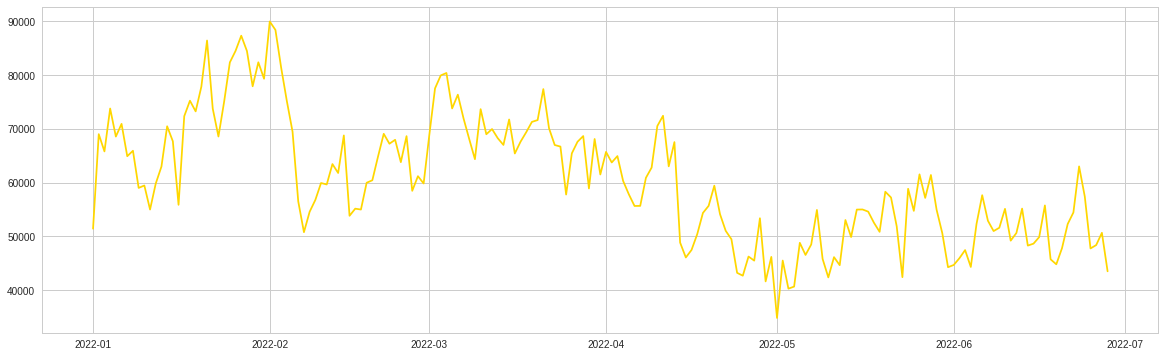

In [177]:
df_pred['SOLDDATE'] = df_pred['SOLDDATE'].astype('datetime64')
df_pred['QUANT'] = preds

df_pred

plt.figure(figsize=(20,6))
plt.plot(df_pred.set_index('SOLDDATE'), color = 'gold')

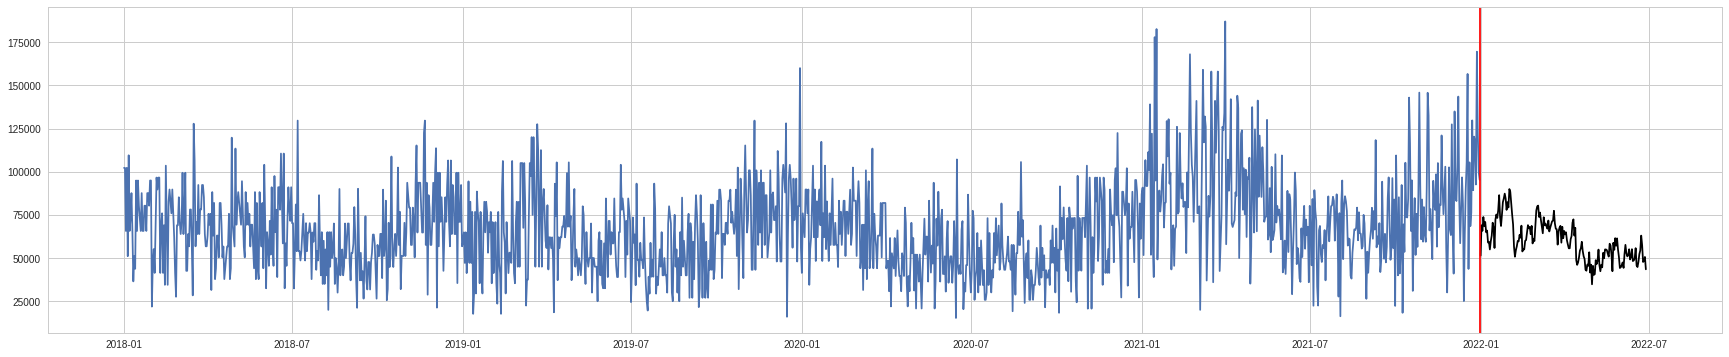

In [178]:
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
plt.figure(figsize=(30,6))
# plt.plot(preds.reshape(-1), label='prediction')
plt.plot(df_result['QUANT'])
plt.plot(df_pred.set_index('SOLDDATE'), color = 'black')
plt.axvline(df_result.index[-1], color='r')
plt.show()

# # MAE, MSE, RMSE 평가지표 함수

In [84]:
def MAE(y_true, y_pred):
    return "{:.2e}".format(np.mean(np.abs(y_true-y_pred)))

def MSE(y_true, y_pred):
    return "{:.2e}".format(np.mean(np.square(y_true-y_pred)))

def RMSE(y_true, y_pred):
    return "{:.2e}".format(np.sqrt(np.mean(np.square(y_true-y_pred))))

def R2(y_true, y_pred):
    return "{:.2e}".format(1-(np.sum(np.square(y_true-y_pred)/np.sum(np.square(y_true-np.mean(y_true))))))

In [126]:
from sklearn.metrics import r2_score

y_pred = preds

print(MAE(df_result['QUANT'][-179:], y_pred))
print(MSE(df_result['QUANT'][-179:], y_pred))
print(RMSE(df_result['QUANT'][-179:], y_pred))
print(r2_score(df_result['QUANT'][-179:], y_pred))

1.96e+04
6.63e+08
2.58e+04
0.08454374765029338
